# Import key libraries

In [16]:
import numpy as np
import pandas as pd

import scipy


import bt
import ffn
import jhtalib as jhta
import datetime 

# import matplotlib as plt 
import seaborn as sns
sns.set()


import datetime
import matplotlib.pyplot as plt

%matplotlib inline

# Import the datareader with fix

In [17]:
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2019, 1, 27)

from pandas_datareader import data as pdr
import fix_yahoo_finance as fyf
fyf.pdr_override()
pd.core.common.is_list_like = pd.api.types.is_list_like


# Bring In some Commodity ETF data linked to the 3 main composition choices:
1. DBC - Invesco DB Commodity Index Tracking Fund 

Net Assets: $2.49 billion

DBC

https://www.invesco.com/portal/site/us/investors/etfs/product-detail?productId=dbc

DBC is the elephant in the commodities room – by far the largest ETF in terms of assets under management. It tracks an index of 14 commodities using futures contracts for exposure. It tackles the weighting problem creatively, capping energy at 60% to allow for more exposure to non-consumables such as gold and silver. The fund's large size also gives it excellent liquidity.

source :https://www.investopedia.com/investing/commodities-etfs/


2. iPath Dow Jones-UBS Commodity ETN <<<<-------- this is the current incarnation of AIG Comm

Net Assets: $810.0 M

DJP

http://www.ipathetn.com/US/16/en/details.app?instrumentId=1193

The Bloomberg Commodity Index (BCOM) is a broadly diversified commodity price index distributed by Bloomberg Indexes. The index was originally launched in 1998 as the Dow Jones-AIG Commodity Index (DJ-AIGCI) and renamed to Dow Jones-UBS Commodity Index (DJ-UBSCI) in 2009, when UBS acquired the index from AIG. On July 1, 2014, the index was rebranded under its current name.

The BCOM tracks prices of futures contracts on physical commodities on the commodity markets. The index is designed to minimize concentration in any one commodity or sector. It currently has 22 commodity futures in seven sectors. No one commodity can compose less than 2% or more than 15% of the index, and no sector can represent more than 33% of the index (as of the annual weightings of the components). The weightings for each commodity included in BCOM are calculated in accordance with rules that ensure that the relative proportion of each of the underlying individual commodities reflects its global economic significance and market liquidity. Annual rebalancing and reweighting ensure that diversity is maintained over time

source : https://en.wikipedia.org/wiki/Bloomberg_Commodity_Index

3. iShares S&P GSCI Commodity-Indexed Trust

Net Assets: $1.32 billion

GSG

The S&P GSCI contains as many commodities as possible, with rules excluding certain commodities to maintain liquidity and investability in the underlying futures markets. The index currently comprises 24 commodities from all commodity sectors - energy products, industrial metals, agricultural products, livestock products and precious metals. The wide range of constituent commodities provides the S&P GSCI with a high level of diversification, across subsectors and within each subsector. This diversity mutes the impact of highly idiosyncratic events, which have large implications for the individual commodity markets, but are minimised when aggregated to the level of the S&P GSCI.

The diversity of the S&P GSCI's constituent commodities, along with their economic weighting allows the index to respond in a stable way to world economic growth, even as the composition of global growth changes across time. When industrialised economies dominate world growth, the metals sector of the GSCI generally responds more than the agricultural components. Conversely, when emerging markets dominate world growth, petroleum-based commodities and agricultural commodities tend to be more responsive.

The S&P GSCI is a world-production weighted index that is based on the average quantity of production of each commodity in the index, over the last five years of available data. This allows the S&P GSCI to be a measure of investment performance as well as serve as an economic indicator.

Production weighting is a quintessential attribute for the index to be a measure of investment performance. This is achieved by assigning a weight to each asset based on the amount of capital dedicated to holding that asset just as market capitalisation is used to assign weights to components of equity indices. Since the appropriate weight assigned to each commodity is in proportion to the amount of that commodity flowing through the economy, the index is also an economic indicator

source: https://en.wikipedia.org/wiki/S%26P_GSCI

From an investment point of view the index designers are attempting to represent expsosure to commodities but commodities have not proven to have an inherent return so concentration rules have been added to improve the return profile but without a great deal of success. 

To capitalize on commodity markets a strategy must be at liberty to go long as well as short and weight the exposure by metrics other than world prodcution or some other "economic" metric.






In [18]:
DBC = pdr.get_data_yahoo('DBC',start= start)
DJP = pdr.get_data_yahoo('DJP',start= start)
GSG = pdr.get_data_yahoo('GSG',start= start)



[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [19]:
ETFs = bt.merge(DBC['Adj Close'], DJP['Adj Close'],GSG['Adj Close'])
ETFs.columns = [['Invesco DB Commodity Index Tracking Fund',
                'iPath Dow Jones-UBS Commodity ETN',
                'iShares S&P GSCI Commodity-Indexed Trust']]


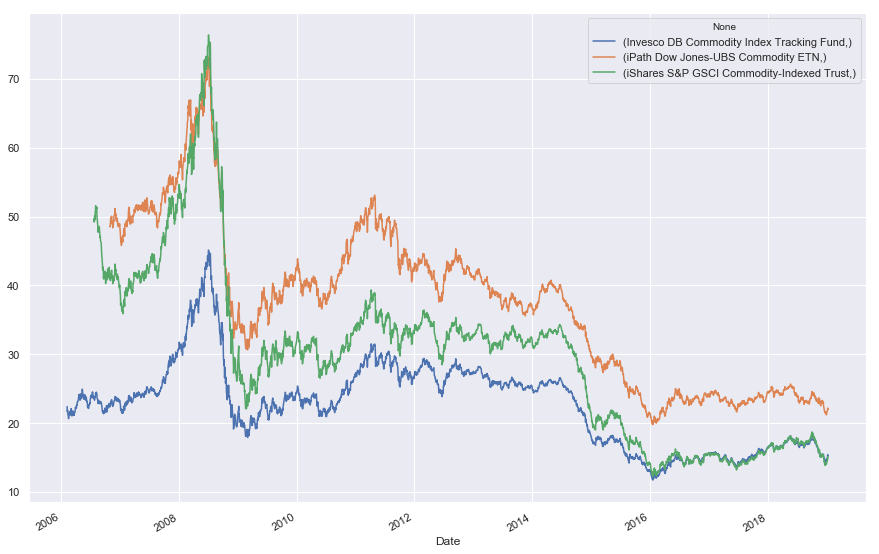

In [21]:
ETFs.plot(figsize=(15,10))

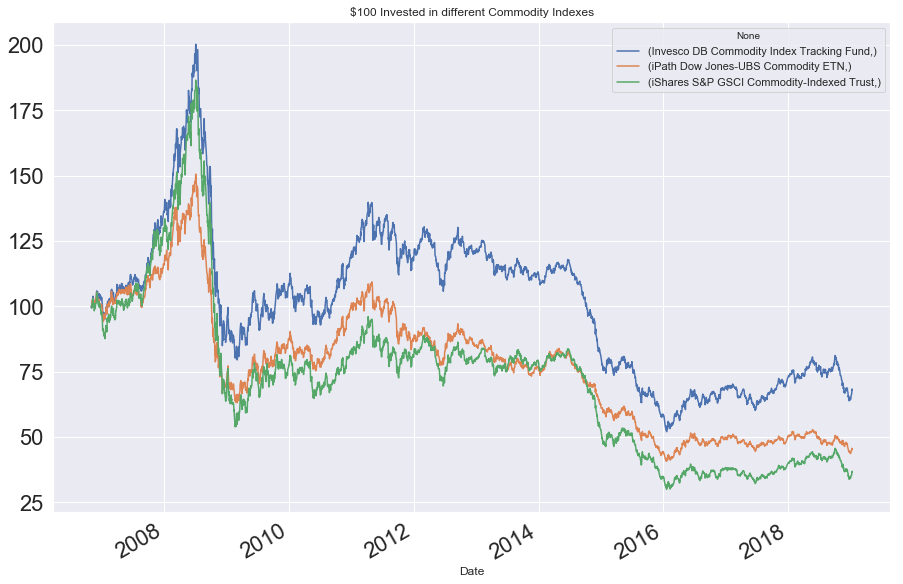

In [35]:
ETFs_re  = pd.DataFrame(ETFs)
# ETFs_re.plot(figsize=(15,10))
ETFs_re  = ETFs.dropna()
ETFs_re = ffn.rebase(ETFs_re)
ETFs_re.plot(figsize=(15,10),fontsize=22, title='$100 Invested in different Commodity Indexes')